In [1]:
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

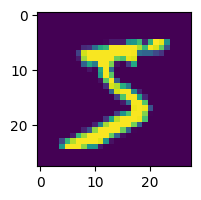

In [3]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [6]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [7]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [8]:
y_train[0]

5

In [9]:
np.max(X_train), np.max(X_test)

(255, 255)

In [10]:
X_train_sc = X_train/255
X_test_sc = X_test/255

In [11]:
np.max(X_train_sc), np.max(X_test_sc)

(1.0, 1.0)

In [12]:
data_augmentation = keras.Sequential([
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
    keras.layers.RandomTranslation(0.1, 0.1),
])

cnn = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    data_augmentation,
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
history = cnn.fit(X_train_sc, y_train, epochs=15, validation_split=0.2, batch_size=128)

# Evaluate the model
test_loss, test_accuracy = cnn.evaluate(X_test_sc, y_test)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5127 - loss: 1.4231 - val_accuracy: 0.9641 - val_loss: 0.1156
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8723 - loss: 0.4220 - val_accuracy: 0.9613 - val_loss: 0.1193
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9106 - loss: 0.3020 - val_accuracy: 0.9709 - val_loss: 0.0927
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9271 - loss: 0.2462 - val_accuracy: 0.9768 - val_loss: 0.0739
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9390 - loss: 0.2100 - val_accuracy: 0.9716 - val_loss: 0.0871
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9444 - loss: 0.1899 - val_accuracy: 0.9826 - val_loss: 0.0546
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9508 - loss: 0.1721 - val_accuracy: 0.9827 - val_loss: 0.0615
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9550 - loss: 0.1609 - val_ac

In [13]:
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9885


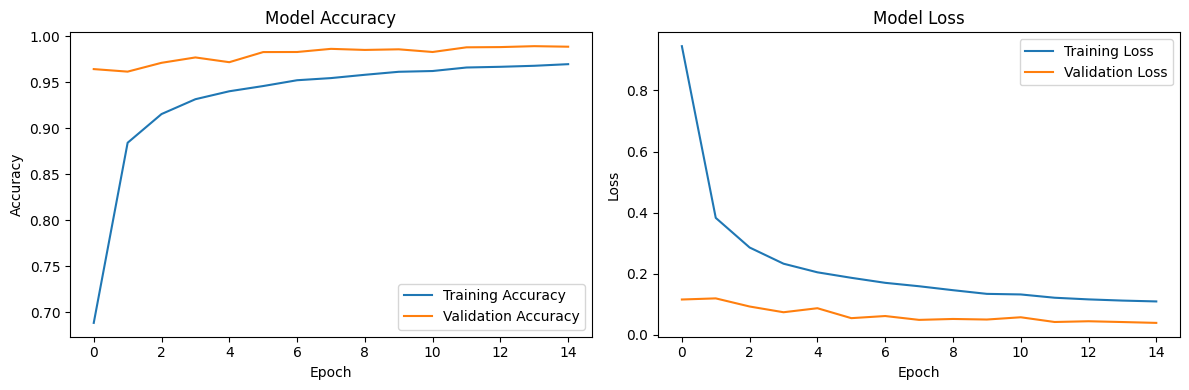

In [14]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()